# Clustering Papers

## Data Importation

In [1]:
import pandas as pd

In [2]:
# load the papers content
papers = pd.read_csv('papers_content.csv')
papers.head()

,file,text,clean_text
0,A Deep Reinforcement Learning Method based on ...,"CEAI, Vol.23, No.3, pp. 88-98, 2021 ...",ceai vol printed romania deep reinforcement le...
1,A deep reinforcement learning-based method app...,Expert Systems With Applications 176 (2021) 11...,expert system application available online mar...
2,A Limited-Capacity Minimax Theorem for Non-Con...,A Limited-Capacity Minimax Theorem for Non-Con...,limitedcapacity minimax theorem nonconvex game...
3,A Marriage between Adversarial Team Games and ...,A Marriage between Adversarial Team Games and ...,marriage adversarial team game player gamesena...
4,A method of network attack-defense game and co...,Computers & Security 142 (2024) 103871Availabl...,computer security available online april elsev...


## Data Exploration

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
text = papers['text']

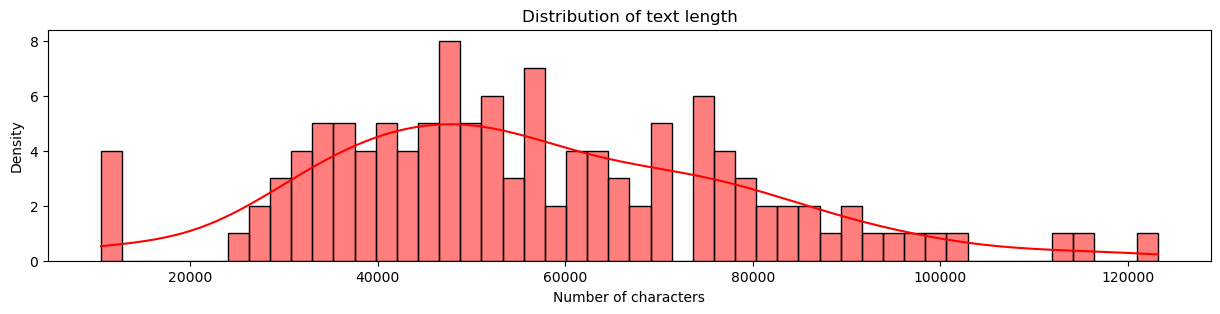

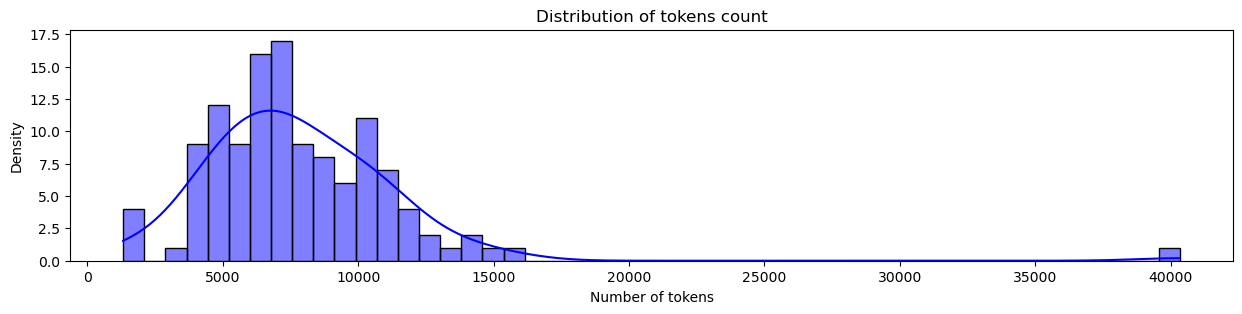

In [5]:
# plot the distribution of text length
plt.figure(figsize=(15, 3))
sns.histplot(text.str.len(), kde=True, bins=50, color='red')
plt.title('Distribution of text length')
plt.xlabel('Number of characters')
plt.ylabel('Density')
plt.show()

# plot the distribution of tokens count
plt.figure(figsize=(15, 3))
sns.histplot(text.str.split().map(len), kde=True, bins=50, color='blue')
plt.title('Distribution of tokens count')
plt.xlabel('Number of tokens')
plt.ylabel('Density')
plt.show()

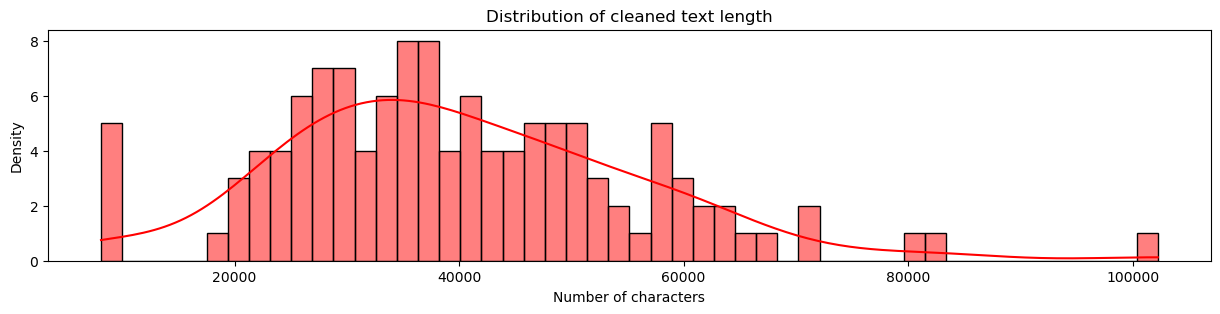

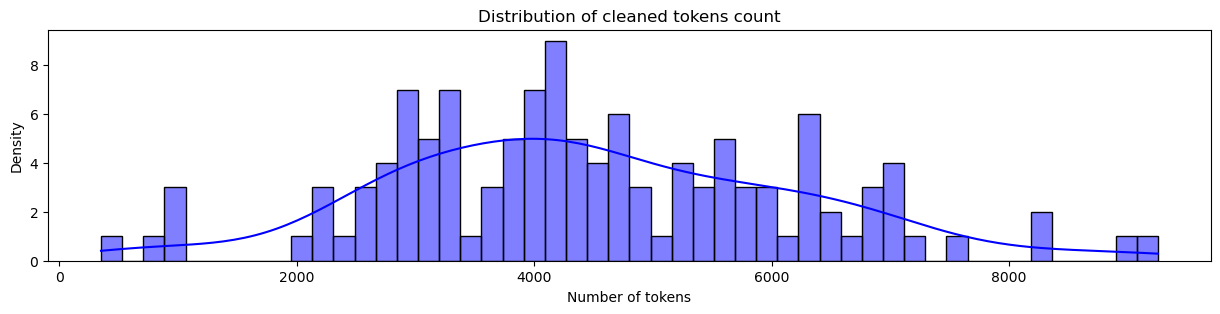

In [6]:
# repeat same process on cleaned text
clean_text = papers['clean_text']

plt.figure(figsize=(15, 3))
sns.histplot(clean_text.str.len(), kde=True, bins=50, color='red')
plt.title('Distribution of cleaned text length')
plt.xlabel('Number of characters')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(15, 3))
sns.histplot(clean_text.str.split().map(len), kde=True, bins=50, color='blue')
plt.title('Distribution of cleaned tokens count')
plt.xlabel('Number of tokens')
plt.ylabel('Density')
plt.show()

In [7]:
# extract the max length of text and cleaned text
max_text_length = text.str.len().max()
max_clean_text_length = clean_text.str.len().max()
max_text_tokens = text.str.split().map(len).max()
max_clean_text_tokens = clean_text.str.split().map(len).max()

print(f'Max text length:\t\t {max_text_length} characters')
print(f'Max cleaned text length:\t {max_clean_text_length} characters')
print(f'Max text tokens:\t\t {max_text_tokens} tokens')
print(f'Max cleaned text tokens:\t {max_clean_text_tokens} tokens')

Max text length:		 123196 characters
Max cleaned text length:	 102237 characters
Max text tokens:		 40346 tokens
Max cleaned text tokens:	 9251 tokens


In [8]:
# NLP to find the most common words
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

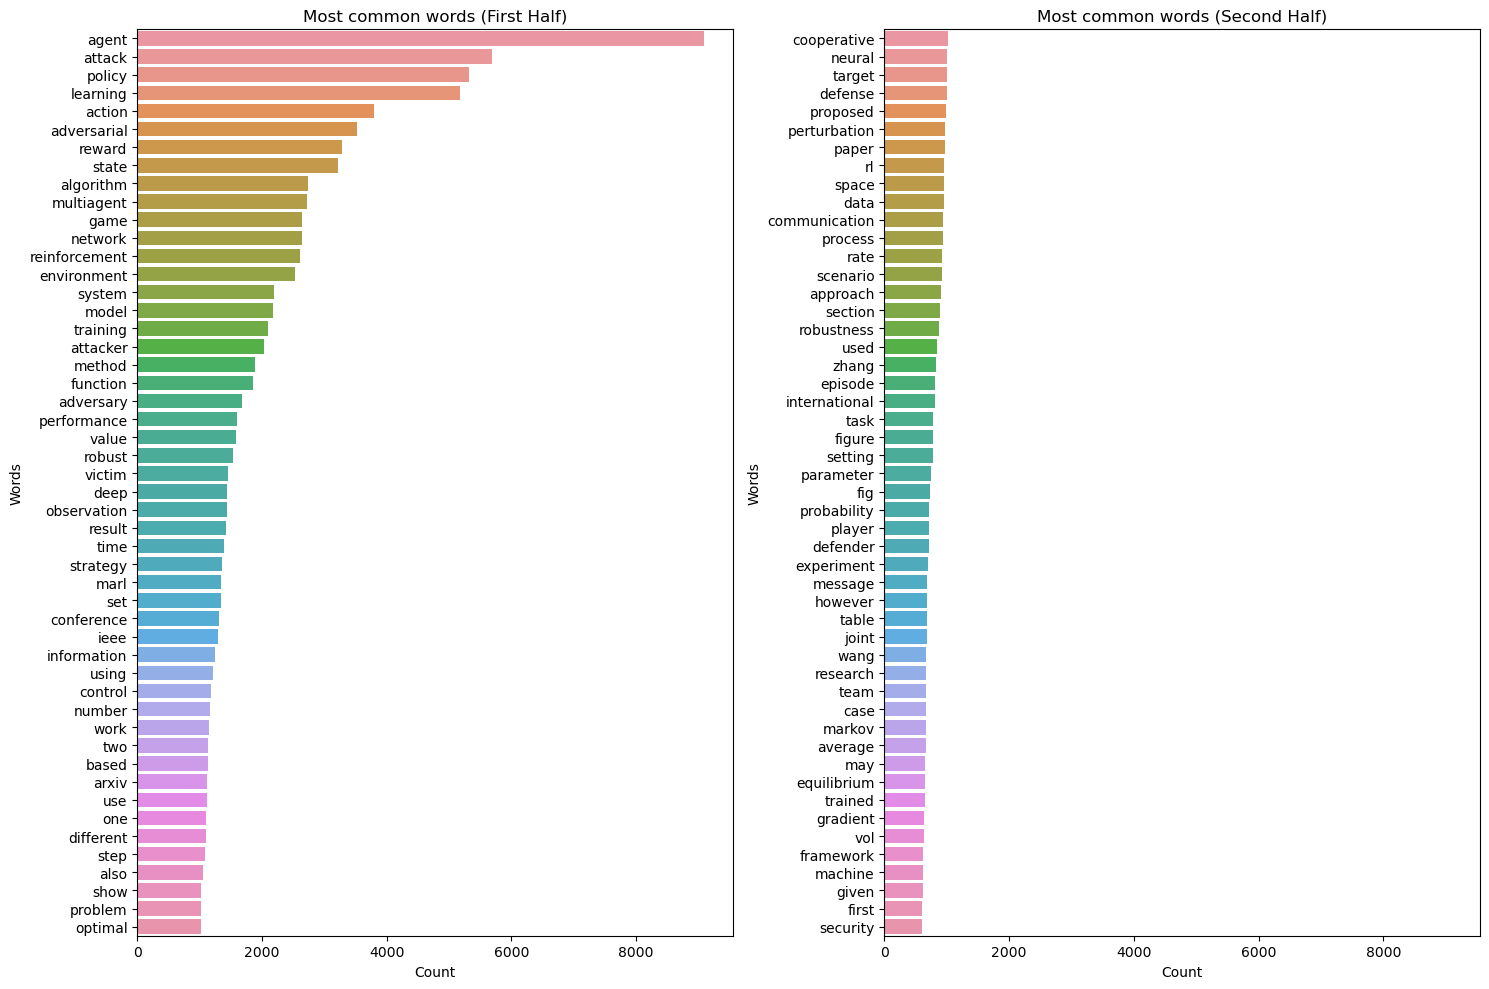

In [9]:
# get the stop words
stop_words = set(stopwords.words('english'))

# tokenize the text
tokens = clean_text.apply(word_tokenize)

# remove stop words
tokens = tokens.apply(lambda x: [word for word in x if word.lower() not in stop_words])

# count the words
words = Counter()

for token in tokens:
    words.update(token)
    
most_common_words = words.most_common(100)

# split the most common words into two halves
half = len(most_common_words) // 2
first_half = most_common_words[:half]
second_half = most_common_words[half:]

# create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# plot the first half
sns.barplot(y=[word[0] for word in first_half], x=[word[1] for word in first_half], orient='h', ax=axes[0])
axes[0].set_title('Most common words (First Half)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Words')

# plot the second half
sns.barplot(y=[word[0] for word in second_half], x=[word[1] for word in second_half], orient='h', ax=axes[1])
axes[1].set_title('Most common words (Second Half)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Words')
axes[1].set_xlim(axes[0].get_xlim())

plt.tight_layout()
plt.show()

## Topic Modeling with BERTopic

In [10]:
from bertopic import BERTopic
from umap import UMAP
from hdbscan import HDBSCAN
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance
from tqdm import tqdm

In [34]:
# training a global model
zeroshot_topics = ['attack', 'defense', 'communication', 'robust', 'adversarial', 'power', 'vehicle', 'cyber']
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
global_model = BERTopic(embedding_model=embedding_model,
                        vectorizer_model=CountVectorizer(stop_words="english"),
                        umap_model=UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42),
                        hdbscan_model=HDBSCAN(min_cluster_size=2, metric='euclidean', cluster_selection_method='leaf', prediction_data=True),
                        representation_model={'KeyBERT' : KeyBERTInspired(), 'MMR' : MaximalMarginalRelevance(diversity=0.3)},
                        
                        # Hyperparameters    
                        zeroshot_topic_list=zeroshot_topics,
                        zeroshot_min_similarity=.2,
                        # calculate_probabilities=True,
                        # nr_topics="auto",
                        # min_topic_size=10,
                        # top_n_words=10,
                        verbose=True
                       )
global_embeddings = embedding_model.encode(clean_text, show_progress_bar=True)
topics, probas = global_model.fit_transform(clean_text)
global_model.get_topic_info()

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2025-01-16 23:19:12,066 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/4 [00:00<?, ?it/s]

2025-01-16 23:19:21,057 - BERTopic - Embedding - Completed ✓
2025-01-16 23:19:21,059 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-16 23:19:21,228 - BERTopic - Dimensionality - Completed ✓
2025-01-16 23:19:21,228 - BERTopic - Zeroshot Step 1 - Finding documents that could be assigned to either one of the zero-shot topics
2025-01-16 23:19:21,266 - BERTopic - Zeroshot Step 1 - Completed ✓
2025-01-16 23:19:21,271 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-16 23:19:21,277 - BERTopic - Cluster - Completed ✓
2025-01-16 23:19:21,278 - BERTopic - Zeroshot Step 2 - Combining topics from zero-shot topic modeling with topics from clustering...
2025-01-16 23:19:21,285 - BERTopic - Zeroshot Step 2 - Completed ✓
2025-01-16 23:19:21,285 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-16 23:19:27,198 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,3,-1_student_environment_voltage_maestro,"[student, environment, voltage, maestro, agent...","[multiagent, reinforcement, agent, curriculum,...","[student, voltage, maestro, agent, control, tr...",[httpsdoior gsswitchingawaremultiagentdeeprein...
1,0,17,attack,"[attacker, agent, attack, action, model, netwo...","[multiagent, reinforcement, agent, strategy, a...","[attacker, agent, defender, strategy, reinforc...",[computer security content list available scie...
2,1,4,defense,"[game, learning, defender, state, attacker, ac...","[defence, strategy, defender, reinforcement, s...","[defender, ieee, strategy, channel, security, ...",[learning cyber defence tactic scratch multiag...
3,2,4,communication,"[message, communication, agent, cooperative, p...","[multiagent, communicate, reinforcement, agent...","[message, communication, agent, cooperative, m...",[robust communicative multiagent reinforcement...
4,3,9,robust,"[agent, robust, policy, reward, learning, adve...","[reinforcement, multiagent, agent, robustness,...","[agent, learning, adversary, multiagent, reinf...",[published tiny paper iclr robustness evaluati...
5,4,75,adversarial,"[agent, attack, policy, adversarial, learning,...","[reinforcement, adversarial, multiagent, strat...","[agent, attack, adversarial, learning, game, r...",[adversarial policy learning twoplayer competi...
6,5,1,power,"[power, prim, agent, sbpr, game, regularizatio...","[powerregularized, trainadversarialagent, rewa...","[agent, sbpr, objective, padversarial, regular...",[benefit power regularization cooperativereinf...
7,6,5,vehicle,"[control, agent, controller, charging, learnin...","[multiagent, convoy, uav, reinforcement, multi...","[control, agent, controller, byzantine, multia...",[citation medhi liu wangq chen robust multiage...
8,7,3,cyber,"[radar, packet, network, cognitive, agent, mad...","[decisionmaking, reinforcement, cyber, strateg...","[radar, packet, maddpg, jamming, attacker, ddp...",[cyber attack intent recognition active decept...


In [12]:
# merge manually topics :
# 1 and 5 (attack and adversarial)
# 2 and 4 (defense and robust)
# 6 and 7 and 8 (cyber, power, vehicle)
global_model.merge_topics(clean_text,[[0,4],[1,3],[5,6,7]])
topics_df = global_model.get_topic_info()
topics_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,3,-1_student_agent_environment_voltage,"[student, agent, environment, voltage, multiag...","[multiagent, reinforcement, agent, curriculum,...","[agent, voltage, multiagent, maestro, control,...",[httpsdoior gsswitchingawaremultiagentdeeprein...
1,0,92,0_agent_attack_policy_learning,"[agent, attack, policy, learning, adversarial,...","[adversarial, reinforcement, multiagent, agent...","[agent, attack, adversarial, game, reinforceme...",[computer security content list available scie...
2,1,13,defense,"[agent, learning, policy, game, state, reward,...","[multiagent, reinforcement, robustness, robust...","[agent, learning, policy, game, reward, advers...",[published tiny paper iclr robustness evaluati...
3,2,4,2_message_communication_agent_policy,"[message, communication, agent, policy, learni...","[multiagent, communicate, reinforcement, agent...","[message, communication, agent, cooperative, m...",[robust communicative multiagent reinforcement...
4,5,9,cyber,"[agent, network, control, action, learning, st...","[multiagent, reinforcement, mitigation, decisi...","[agent, radar, controller, multiagent, packet,...",[digital signal processing content list availa...


In [13]:
topics_df['Name'].iloc[3] = 'communication'
topics_df['Name'].iloc[1] = 'attack'
topics_df['Name'].iloc[0] = 'other'
topics_df['Name'].iloc[4] = 'applications'
topics_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,3,other,"[student, agent, environment, voltage, multiag...","[multiagent, reinforcement, agent, curriculum,...","[agent, voltage, multiagent, maestro, control,...",[httpsdoior gsswitchingawaremultiagentdeeprein...
1,0,92,attack,"[agent, attack, policy, learning, adversarial,...","[adversarial, reinforcement, multiagent, agent...","[agent, attack, adversarial, game, reinforceme...",[computer security content list available scie...
2,1,13,defense,"[agent, learning, policy, game, state, reward,...","[multiagent, reinforcement, robustness, robust...","[agent, learning, policy, game, reward, advers...",[published tiny paper iclr robustness evaluati...
3,2,4,communication,"[message, communication, agent, policy, learni...","[multiagent, communicate, reinforcement, agent...","[message, communication, agent, cooperative, m...",[robust communicative multiagent reinforcement...
4,5,9,applications,"[agent, network, control, action, learning, st...","[multiagent, reinforcement, mitigation, decisi...","[agent, radar, controller, multiagent, packet,...",[digital signal processing content list availa...


In [14]:
# create a map of topics to zeroshot topics
topic_map = {topics_df['Topic'][i]: topics_df['Name'][i] for i in range(len(topics_df))}
topic_map

{-1: 'other', 0: 'attack', 1: 'defense', 2: 'communication', 5: 'applications'}

In [15]:
topic_remap = {-1 : 'other',
                0 : 'attack',
                1 : 'defense',
                2 : 'communication',
                3 : 'defense',
                4 : 'attack',
                5 : 'applications',
                6 : 'applications',
                7 : 'applications'}
new_topics = [topic_remap[topic] for topic in topics]

In [16]:
# get topic of every paper
papers['topic'] = new_topics

In [17]:
papers.head()

,file,text,clean_text,topic
0,A Deep Reinforcement Learning Method based on ...,"CEAI, Vol.23, No.3, pp. 88-98, 2021 ...",ceai vol printed romania deep reinforcement le...,attack
1,A deep reinforcement learning-based method app...,Expert Systems With Applications 176 (2021) 11...,expert system application available online mar...,attack
2,A Limited-Capacity Minimax Theorem for Non-Con...,A Limited-Capacity Minimax Theorem for Non-Con...,limitedcapacity minimax theorem nonconvex game...,attack
3,A Marriage between Adversarial Team Games and ...,A Marriage between Adversarial Team Games and ...,marriage adversarial team game player gamesena...,attack
4,A method of network attack-defense game and co...,Computers & Security 142 (2024) 103871Availabl...,computer security available online april elsev...,attack


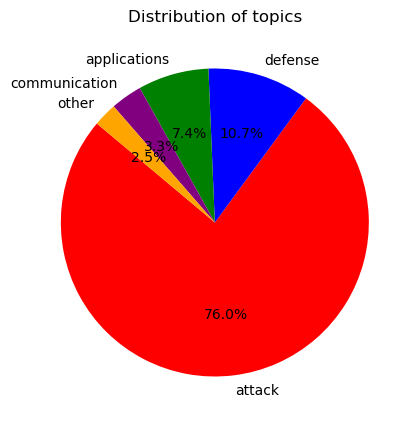

In [18]:
# pie chart of topics
plt.figure(figsize=(5, 5))
papers['topic'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green', 'purple', 'orange'])
plt.title('Distribution of topics')
plt.ylabel('')
plt.show()

In [19]:
# save the papers with topics
papers.to_csv('papers_topics.csv', index=False)

In [ ]:
# rerun the bertopic on the 'attack' topic only
attack_papers = papers[papers['topic'] == 'attack']
attack_papers.reset_index(inplace=True)
attack_clean_text = attack_papers['clean_text']
attack_embeddings = embedding_model.encode(attack_clean_text, show_progress_bar=True)

In [83]:
# training a attack model
zeroshot_topics_attack = ['attack','defense', 'communication', 'message', 'robust', 'cyber', 'regret']
attack_model = BERTopic(embedding_model=embedding_model,
                        vectorizer_model=CountVectorizer(stop_words="english"),
                        umap_model=UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42),
                        hdbscan_model=HDBSCAN(min_cluster_size=2, metric='euclidean', cluster_selection_method='leaf', prediction_data=True),
                        representation_model={'KeyBERT' : KeyBERTInspired(), 'MMR' : MaximalMarginalRelevance(diversity=0.3)},
                        
                        # Hyperparameters    
                        zeroshot_topic_list=zeroshot_topics_attack,
                        zeroshot_min_similarity=.2,
                        # calculate_probabilities=True,
                        # nr_topics="auto",
                        # min_topic_size=10,
                        # top_n_words=10,
                        verbose=True
                       )
topics, probas = attack_model.fit_transform(attack_clean_text)
attack_model.get_topic_info()

2025-01-17 00:18:00,064 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

2025-01-17 00:18:06,579 - BERTopic - Embedding - Completed ✓
2025-01-17 00:18:06,579 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-17 00:18:06,707 - BERTopic - Dimensionality - Completed ✓
2025-01-17 00:18:06,713 - BERTopic - Zeroshot Step 1 - Finding documents that could be assigned to either one of the zero-shot topics
2025-01-17 00:18:06,740 - BERTopic - Zeroshot Step 1 - Completed ✓
2025-01-17 00:18:06,751 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-17 00:18:06,756 - BERTopic - Cluster - Completed ✓
2025-01-17 00:18:06,757 - BERTopic - Zeroshot Step 2 - Combining topics from zero-shot topic modeling with topics from clustering...
2025-01-17 00:18:06,761 - BERTopic - Zeroshot Step 2 - Completed ✓
2025-01-17 00:18:06,762 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-17 00:18:12,894 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,1,-1_reincarnation_poisoning_selective_observation,"[reincarnation, poisoning, selective, observat...","[reincarnating, reincarnation, reinforcement, ...","[reincarnation, poisoning, observation, learni...",[neural processing letter httpsdoiorgswa pilot...
1,0,52,attack,"[attack, agent, policy, learning, action, atta...","[reinforcement, adversarial, multiagent, strat...","[attack, agent, attacker, adversarial, reinfor...",[ieee internet thing journal vol february prom...
2,1,1,defense,"[trigger, shine, backdoor, clean, shielding, e...","[backdoor, adversarial, agent, reinforcement, ...","[trigger, backdoor, shielding, attack, agent, ...",[shine shielding backdoor deep reinforcement l...
3,2,4,communication,"[game, sound, team, environment, message, saa,...","[reinforcement, multiagent, strategy, agent, a...","[environment, saa, player, navigation, agent, ...",[entropyarticlean improved approach towards mu...
4,3,1,message,"[na, eam, oac, saw, mathematicalformulation, a...",[opportunitiesinadversarialreinforcementlearni...,"[oac, mathematicalformulation, arlimplementati...",[adversarialreinfor cementlearninginmultiagent...
5,4,14,robust,"[policy, agent, learning, adversarial, robust,...","[adversarial, reinforcement, agent, multiagent...","[policy, agent, learning, adversarial, game, a...",[robust multiagent reinforcement learning viaa...
6,5,7,cyber,"[learning, agent, network, algorithm, communic...","[multiagent, adversarial, reinforcement, agent...","[agent, network, algorithm, communication, eav...",[hierarchical multiagent reinforcement learnin...
7,6,1,regret,"[regret, level, minimax, ued, policy, mmr, tra...","[optimal, learning, minimax, agent, regretbase...","[regret, minimax, mmr, trajectory, agent, adve...",[refining minimax regret unsupervised environm...
8,7,7,7_state_policy_agent_game,"[state, policy, agent, game, equilibrium, play...","[reinforcement, strategy, agent, adversarial, ...","[agent, equilibrium, learning, adversarial, ma...",[arxivv cslg may romfac robust meanﬁeld actorc...
9,8,4,8_npc_player_reward_av,"[npc, player, reward, av, adversarial, learnin...","[multiagent, reinforcement, autonomous, agent,...","[npc, player, av, adversarial, autonomous, mul...",[multiagent adversarial inverse reinforcement ...


In [84]:
attack_df = attack_model.get_topic_info()

In [85]:
attack_df['Name'].iloc[5] = 'defense'
attack_df['Name'].iloc[3] = 'communication'
attack_df['Name'].iloc[6] = 'applications'
attack_df['Name'].iloc[7] = 'defense'
attack_df['Name'].iloc[8] = 'attack'
attack_df['Name'].iloc[9] = 'applications'
attack_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,1,-1_reincarnation_poisoning_selective_observation,"[reincarnation, poisoning, selective, observat...","[reincarnating, reincarnation, reinforcement, ...","[reincarnation, poisoning, observation, learni...",[neural processing letter httpsdoiorgswa pilot...
1,0,52,attack,"[attack, agent, policy, learning, action, atta...","[reinforcement, adversarial, multiagent, strat...","[attack, agent, attacker, adversarial, reinfor...",[ieee internet thing journal vol february prom...
2,1,1,defense,"[trigger, shine, backdoor, clean, shielding, e...","[backdoor, adversarial, agent, reinforcement, ...","[trigger, backdoor, shielding, attack, agent, ...",[shine shielding backdoor deep reinforcement l...
3,2,4,communication,"[game, sound, team, environment, message, saa,...","[reinforcement, multiagent, strategy, agent, a...","[environment, saa, player, navigation, agent, ...",[entropyarticlean improved approach towards mu...
4,3,1,message,"[na, eam, oac, saw, mathematicalformulation, a...",[opportunitiesinadversarialreinforcementlearni...,"[oac, mathematicalformulation, arlimplementati...",[adversarialreinfor cementlearninginmultiagent...
5,4,14,defense,"[policy, agent, learning, adversarial, robust,...","[adversarial, reinforcement, agent, multiagent...","[policy, agent, learning, adversarial, game, a...",[robust multiagent reinforcement learning viaa...
6,5,7,applications,"[learning, agent, network, algorithm, communic...","[multiagent, adversarial, reinforcement, agent...","[agent, network, algorithm, communication, eav...",[hierarchical multiagent reinforcement learnin...
7,6,1,defense,"[regret, level, minimax, ued, policy, mmr, tra...","[optimal, learning, minimax, agent, regretbase...","[regret, minimax, mmr, trajectory, agent, adve...",[refining minimax regret unsupervised environm...
8,7,7,attack,"[state, policy, agent, game, equilibrium, play...","[reinforcement, strategy, agent, adversarial, ...","[agent, equilibrium, learning, adversarial, ma...",[arxivv cslg may romfac robust meanﬁeld actorc...
9,8,4,applications,"[npc, player, reward, av, adversarial, learnin...","[multiagent, reinforcement, autonomous, agent,...","[npc, player, av, adversarial, autonomous, mul...",[multiagent adversarial inverse reinforcement ...


In [86]:
topics_df

,Topic,Count,Name,Representation,KeyBERT,MMR,Representative_Docs
0,-1,3,other,"[student, agent, environment, voltage, multiag...","[multiagent, reinforcement, agent, curriculum,...","[agent, voltage, multiagent, maestro, control,...",[httpsdoior gsswitchingawaremultiagentdeeprein...
1,0,92,attack,"[agent, attack, policy, learning, adversarial,...","[adversarial, reinforcement, multiagent, agent...","[agent, attack, adversarial, game, reinforceme...",[computer security content list available scie...
2,1,13,defense,"[agent, learning, policy, game, state, reward,...","[multiagent, reinforcement, robustness, robust...","[agent, learning, policy, game, reward, advers...",[published tiny paper iclr robustness evaluati...
3,2,4,communication,"[message, communication, agent, policy, learni...","[multiagent, communicate, reinforcement, agent...","[message, communication, agent, cooperative, m...",[robust communicative multiagent reinforcement...
4,5,9,applications,"[agent, network, control, action, learning, st...","[multiagent, reinforcement, mitigation, decisi...","[agent, radar, controller, multiagent, packet,...",[digital signal processing content list availa...


In [87]:
attack_papers['topic'] = topics

In [88]:
attack_papers.head()

,index,file,text,clean_text,topic
0,0,A Deep Reinforcement Learning Method based on ...,"CEAI, Vol.23, No.3, pp. 88-98, 2021 ...",ceai vol printed romania deep reinforcement le...,0
1,1,A deep reinforcement learning-based method app...,Expert Systems With Applications 176 (2021) 11...,expert system application available online mar...,0
2,2,A Limited-Capacity Minimax Theorem for Non-Con...,A Limited-Capacity Minimax Theorem for Non-Con...,limitedcapacity minimax theorem nonconvex game...,7
3,3,A Marriage between Adversarial Team Games and ...,A Marriage between Adversarial Team Games and ...,marriage adversarial team game player gamesena...,2
4,4,A method of network attack-defense game and co...,Computers & Security 142 (2024) 103871Availabl...,computer security available online april elsev...,0


In [89]:
name_mapping = {
    -1: "other",
    0: "attack",
    1: "defense",
    2: "communication",
    3: "communication",
    4: "defense",
    5: "applications",
    6: "defense",
    7: "attack",
    8: "applications"
}

attack_papers['topic'] = attack_papers['topic'].map(name_mapping)

In [90]:
attack_papers.head()

,index,file,text,clean_text,topic
0,0,A Deep Reinforcement Learning Method based on ...,"CEAI, Vol.23, No.3, pp. 88-98, 2021 ...",ceai vol printed romania deep reinforcement le...,attack
1,1,A deep reinforcement learning-based method app...,Expert Systems With Applications 176 (2021) 11...,expert system application available online mar...,attack
2,2,A Limited-Capacity Minimax Theorem for Non-Con...,A Limited-Capacity Minimax Theorem for Non-Con...,limitedcapacity minimax theorem nonconvex game...,attack
3,3,A Marriage between Adversarial Team Games and ...,A Marriage between Adversarial Team Games and ...,marriage adversarial team game player gamesena...,communication
4,4,A method of network attack-defense game and co...,Computers & Security 142 (2024) 103871Availabl...,computer security available online april elsev...,attack


In [91]:
# for each row in both papers and attacks_df, update the column 'topic' value in papers to its corresponding value in attacks_df, using 'Name' column as index
for file in attack_papers['file']:
    papers.loc[papers['file'] == file, 'topic'] = attack_papers.loc[attack_papers['file'] == file, 'topic'].values[0]

In [92]:
# count the number of papers in each topic
papers['topic'].value_counts()

topic
attack           59
defense          29
applications     20
communication     9
other             4
Name: count, dtype: int64

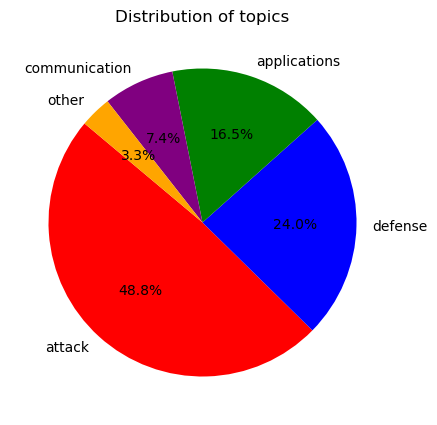

In [93]:
# pie chart 
plt.figure(figsize=(5, 5))
papers['topic'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['red', 'blue', 'green', 'purple', 'orange'])
plt.title('Distribution of topics')
plt.ylabel('')
plt.show()

In [95]:
papers = papers[['file', 'topic']]

In [96]:
papers.to_csv('papers_topics.csv', index=False)